In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Constants

In [2]:
TOKEN_SPAM_PROB_FILE = 'SpamData/03_Testing/prob-spam.txt'
TOKEN_HAM_PROB_FILE = 'SpamData/03_Testing/prob-nonspam.txt'
TOKEN_ALL_PROB_FILE = 'SpamData/03_Testing/prob-all-tokens.txt'

TEST_FEATURE_MATRIX = 'SpamData/03_Testing/test-features.txt'
TEST_TARGET_FILE = 'SpamData/03_Testing/test-target.txt'
VOCAB_SIZE = 2500

# Load the Data

In [3]:
#features
X_test = np.loadtxt(TEST_FEATURE_MATRIX,delimiter = ' ')
#target
y_test = np.loadtxt(TEST_TARGET_FILE,delimiter = ' ')
#Token probabilties
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE,delimiter = ' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE,delimiter = ' ')
prob_all_tokens = np.loadtxt(TOKEN_ALL_PROB_FILE,delimiter = ' ')

# Calculating the Joint probability

### The Dot Product

In [4]:
a = np.array([1,2,3])
b = np.array([0,5,4])
print('a = ',a)
print('b = ',b)

a =  [1 2 3]
b =  [0 5 4]


In [5]:
a.dot(b)

22

In [6]:
c = np.array([[0,6],[3,0],[5,1]])
c.shape

(3, 2)

In [7]:
a.dot(c)

array([21,  9])

In [8]:
X_test.shape

(1724, 2500)

In [9]:
prob_token_spam.shape

(2500,)

In [10]:
print('shape of the dot product is ',X_test.dot(prob_token_spam).shape)

shape of the dot product is  (1724,)


# Set the Prior

### $$ P(spam \, | \, X ) = \frac{P(X \,| \, spam) \, P(spam)}{P(X)}   $$

In [11]:
prob_spam = 0.3116

In [12]:
np.log(prob_token_spam)

array([ -4.40756958,  -5.25364438,  -4.99004682, ..., -10.70789655,
        -8.83609437, -12.09419091])

# Joint Probabilty in log format

In [13]:
joint_log_spam = X_test.dot(np.log(prob_token_spam) - np.log(prob_all_tokens)) + np.log(prob_spam)

In [14]:
joint_log_spam[:5]

array([24.28637595,  2.16367001, 20.59439699, 17.76186879, 20.5171901 ])

In [15]:
joint_log_ham = X_test.dot(np.log(prob_token_ham)-np.log(prob_all_tokens)) + np.log(1 - prob_spam)

In [16]:
joint_log_ham[:5]

array([-60.97520439, -11.01186395, -37.97023133, -59.14021894,
       -53.79548307])

In [17]:
joint_log_ham.size

1724

# Making Predictions

### Checking for the higher joint probability
$$ P(Spam \, | \, X ) > P(Ham \, | \, X) $$
$$ P(Spam \, | \, X ) < P(Ham \, | \, X) $$

In [18]:
prediction = joint_log_spam > joint_log_ham

In [19]:
prediction[-5:]

array([ True, False, False, False, False])

In [20]:
y_test[-5:]

array([0., 0., 0., 0., 0.])

## Simplify

In [21]:
joint_log_spam = X_test.dot(np.log(prob_token_spam)) + np.log(prob_spam)
joint_log_ham = X_test.dot(np.log(prob_token_ham)) + np.log(1 - prob_spam)

# Metrics and Evaluation

### Accuracy

In [22]:
correct_doc = (y_test == prediction).sum()
print('Docs classified correctly',correct_doc)
numdocs_wrong = X_test.shape[0] - correct_doc
print('Docs classified correctly',numdocs_wrong)

Docs classified correctly 1685
Docs classified correctly 39


In [23]:
# Accuracy
correct_doc/len(X_test)

0.9773781902552204

In [24]:
fraction_wrong = numdocs_wrong/ len(X_test)
print('Fraction classified incorrectly is {:.2%}'.format(fraction_wrong))
print('Accuracy of the model is {:.2%}'.format(1-fraction_wrong))

Fraction classified incorrectly is 2.26%
Accuracy of the model is 97.74%


# Visualising the Results

In [25]:
#Chart styling info
yaxis_label = 'P(X | SPAM)'
xaxis_label = 'P(X | NONSPAM)'
linedata = np.linspace(start = -14000,stop = 1,num = 1000)

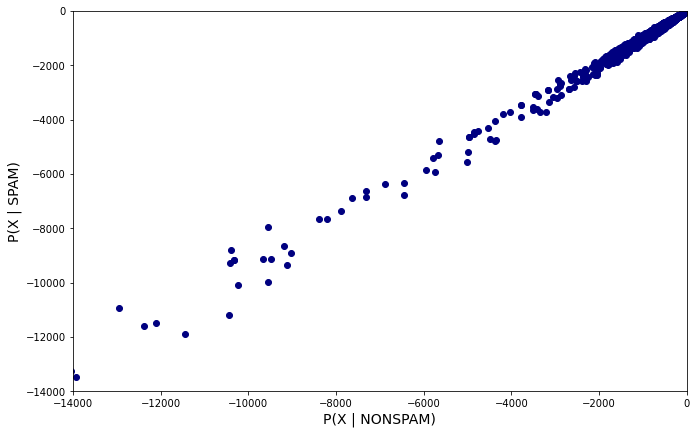

In [26]:
plt.figure(figsize=(11,7))
plt.xlabel(xaxis_label,fontsize=14)
plt.ylabel(yaxis_label,fontsize=14)
plt.xlim([-14000,1])
plt.ylim([-14000,1])

plt.scatter(joint_log_ham,joint_log_spam,color='navy')
plt.show()

# The Decision boundary

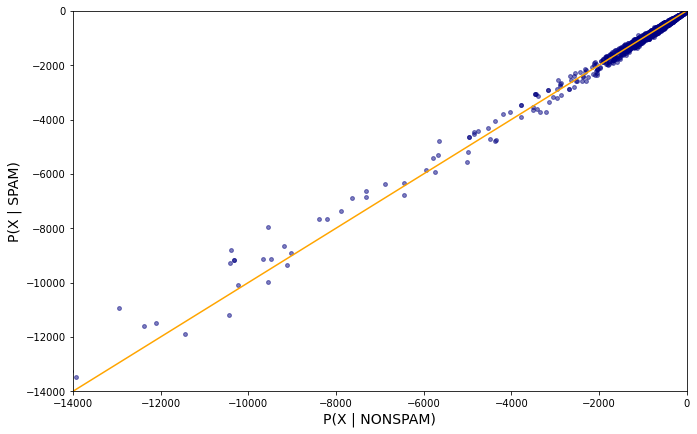

In [27]:
plt.figure(figsize=(11,7))
plt.xlabel(xaxis_label,fontsize=14)
plt.ylabel(yaxis_label,fontsize=14)
plt.xlim([-14000,1])
plt.ylim([-14000,1])

plt.plot(linedata,linedata,color='orange')
plt.scatter(joint_log_ham,joint_log_spam,color='navy',alpha=0.5,s=15)
plt.show()

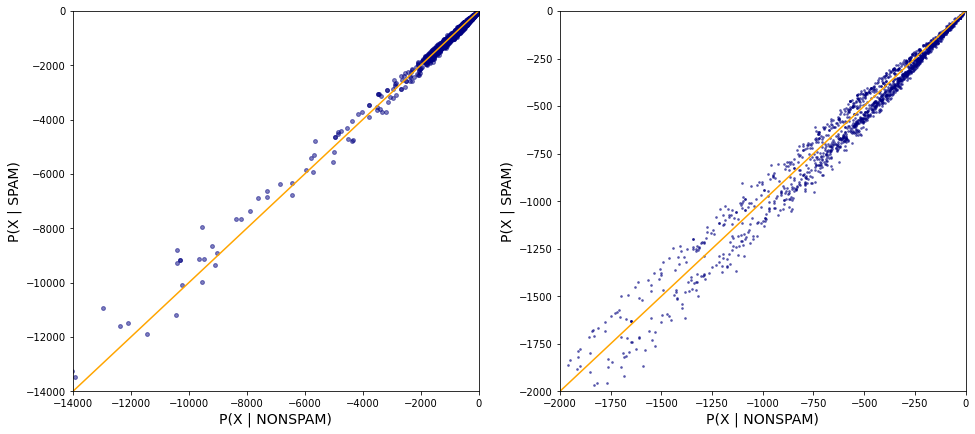

In [28]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
plt.xlabel(xaxis_label,fontsize=14)
plt.ylabel(yaxis_label,fontsize=14)
plt.xlim([-14000,1])
plt.ylim([-14000,1])

plt.plot(linedata,linedata,color='orange')
plt.scatter(joint_log_ham,joint_log_spam,color='navy',alpha=0.5,s=15)

plt.subplot(1,2,2)
plt.xlabel(xaxis_label,fontsize=14)
plt.ylabel(yaxis_label,fontsize=14)
plt.xlim([-2000,1])
plt.ylim([-2000,1])
plt.plot(linedata,linedata,color='orange')
plt.scatter(joint_log_ham,joint_log_spam,color='navy',alpha=0.5,s=3)

plt.show()

In [29]:
#Chart styling
sns.set_style('whitegrid')
labels = 'Actual Category'

summary_df = pd.DataFrame({yaxis_label:joint_log_spam,xaxis_label:joint_log_ham,labels:y_test})

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


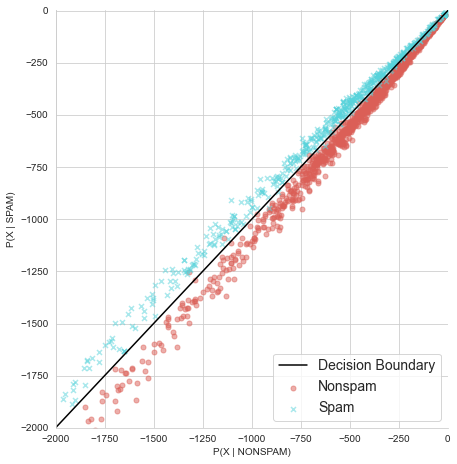

In [30]:
sns.lmplot(x=xaxis_label,y=yaxis_label,data=summary_df,size=6.5,fit_reg =False,legend = False,
           scatter_kws={'alpha':0.5,'s':25},hue=labels,markers=['o','x'],palette='hls')
plt.xlim([-2000,1])
plt.ylim([-2000,1])
plt.plot(linedata,linedata,color='black')
plt.legend(('Decision Boundary','Nonspam','Spam'), loc='lower right',fontsize = 14)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


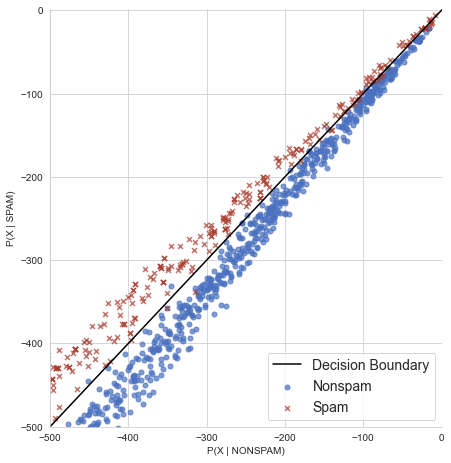

In [31]:
my_colors = ['#4A71C0','#AB3A2C']
sns.lmplot(x=xaxis_label,y=yaxis_label,data=summary_df,size=6.5,fit_reg =False,legend = False,
           scatter_kws={'alpha':0.7,'s':25},hue=labels,markers=['o','x'],palette=my_colors)
plt.xlim([-500,1])
plt.ylim([-500,1])
plt.plot(linedata,linedata,color='black')
plt.legend(('Decision Boundary','Nonspam','Spam'), loc='lower right',fontsize = 14)
plt.show()

# False positives and False negatives

In [32]:
np.unique(prediction,return_counts = True)

(array([False,  True]), array([1136,  588], dtype=int64))

In [33]:
true_pos = (y_test == 1) & (prediction == 1)

In [34]:
true_pos.sum()

569

In [35]:
false_pos = (y_test == 0) & (prediction == 1)
false_pos.sum()

19

In [36]:
false_neg = (y_test == 1) & (prediction == 0)
false_neg.sum()

20

# Recall score

In [42]:
recall_score = true_pos.sum() / (true_pos.sum() + false_neg.sum())
print('Recall score is {:.2}'.format(recall_score))

Recall score is 0.97


# Precision Score

In [43]:
precision_score = true_pos.sum() / (true_pos.sum() + false_pos.sum())
print('Precision score is {:.3}'.format(precision_score))

Precision score is 0.968


# F-score or F1 score

In [44]:
f1_score = (2 * precision_score * recall_score) / (precision_score + recall_score)
print('F score is {:.2}'.format(f1_score))

F score is 0.97
